In [207]:
# Principal Component Analysis y
# Empirical Orthogonal Functions.

import os
import warnings

import pandas as pd
import numpy as np

from scipy import stats

from numpy import linalg as LA
from matplotlib import pyplot as plt

# Ignora warnings
# ¡¡usar solo al terminar el programa!!
warnings.filterwarnings("ignore", category = UserWarning)

In [208]:
# Datos.
path = "../datos/A.1_Wilks.csv"
var = ["Ithaca - Min Temp",
    "Canandaigua - Min Temp"]
var_a = ["Ithaca - Min Temp - Anomalies",
    "Canandaigua - Min Temp - Anomalies"]
df = pd.read_csv(path)[var]

# Matriz de covarianzas.
df.cov()

,Ithaca - Min Temp,Canandaigua - Min Temp
Ithaca - Min Temp,185.466667,110.800000
Canandaigua - Min Temp,110.800000,77.580645


In [209]:
# Anomalías.
df[var_a] = df[var] - df.mean()

df.head()

,Ithaca - Min Temp,Canandaigua - Min Temp,Ithaca - Min Temp - Anomalies,Canandaigua - Min Temp - Anomalies
0,19,28,6.0,7.774194
1,25,28,12.0,7.774194
2,22,26,9.0,5.774194
3,-1,19,-14.0,-1.225806
4,4,16,-9.0,-4.225806


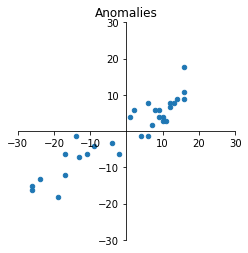

In [241]:
# Anomalías

fig, ax = plt.subplots()

df.plot.scatter(*var_a, title = "Anomalies",
    ax = ax)

ax.set_xlabel(None)
ax.set_ylabel(None)

# Centra los ejes.
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_xticks( list(ax.get_xticks())[0:3]
    + list(ax.get_xticks())[-3:] )
ax.set_xticks( [-30, -20, -10, 10, 20, 30] )
ax.set_yticks( list(ax.get_xticks())[0:3]
    + list(ax.get_xticks())[-3:] )
ax.set_yticks( [-30, -20, -10, 10, 20, 30] )
ax.set_aspect("equal")

In [211]:
# Eigenvectores y eigenvalores.

w, v = LA.eig( df[var_a].cov() )
v

array([[ 0.84785912, -0.53022156],
       [ 0.53022156,  0.84785912]])

In [247]:
# Ángulo de rotación.

ang = np.arccos(v.T @ np.array([1, 0])) * 180 / np.pi
ang

array([ 32.02042611, 122.02042611])

In [213]:
# Explicación de la variabilidad.

perc = w / w.sum() * 100
perc

array([96.84840544,  3.15159456])

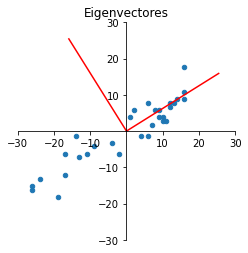

In [244]:
fig, ax = plt.subplots()

df.plot.scatter(*var_a, ax = ax)

ax.plot((0, v[0, 0] * 30), (0, v[1, 0] * 30),
    color = "r")
ax.plot((0, v[0, 1] * 30), (0, v[1, 1] * 30),
    color = "r")

ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_title("Eigenvectores")

# Centra los ejes.
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_xticks( list(ax.get_xticks())[0:3]
    + list(ax.get_xticks())[-3:] )
ax.set_xticks( [-30, -20, -10, 10, 20, 30] )
ax.set_yticks( list(ax.get_xticks())[0:3]
    + list(ax.get_xticks())[-3:] )
ax.set_yticks( [-30, -20, -10, 10, 20, 30] )
ax.set_aspect("equal")

In [215]:
# Componentes principales.

PC = ( v.T @ df[var_a].T ).T

PC.head()

,0,1
0,9.209200,3.410092
1,14.296355,0.228762
2,10.692334,0.123709
3,-12.519977,6.383791
4,-9.871346,1.189106


(0.0, 30.0)

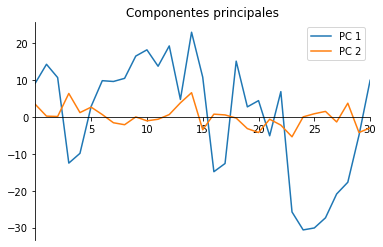

In [232]:
# Componentes principales.

fig, ax = plt.subplots()

PC.plot( title = "Componentes principales",
    ax = ax )

#ax.set_xlabel("Day")
ax.legend(["PC 1", "PC 2"])

# Centra los ejes.
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xticks(ax.get_xticks()[1:])
ax.set_xticks(np.arange(5, 35, 5))
ax.set_xlim(0, 30)

(0.0, 30.0)

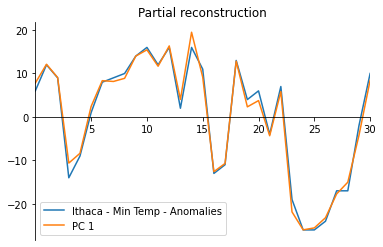

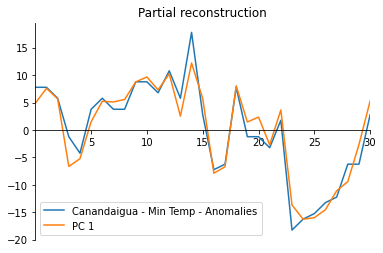

In [254]:
# Reconstrucción parcial.

rec = PC.iloc[:, 0:1] @ v[:,0:1].T

fig, ax = plt.subplots()

df[var_a[0]].plot(ax = ax)
rec.iloc[:, 0].plot(ax = ax)

ax.set_title("Partial reconstruction")
#ax.set_xlabel("Day")
#ax.set_ylabel(var_a[0])
ax.legend([var_a[0], "PC 1"])

# Centra los ejes.
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xticks(ax.get_xticks()[1:])
ax.set_xticks(np.arange(5, 35, 5))
ax.set_xlim(0, 30)


fig, ax = plt.subplots()

df[var_a[1]].plot(ax = ax)
rec.iloc[:, 1].plot(ax = ax)

ax.set_title("Partial reconstruction")
#ax.set_xlabel("Day")
#ax.set_ylabel(var_a[1])
ax.legend([var_a[1], "PC 1"])

# Centra los ejes.
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xticks(ax.get_xticks()[1:])
ax.set_xticks(np.arange(5, 35, 5))
ax.set_xlim(0, 30)

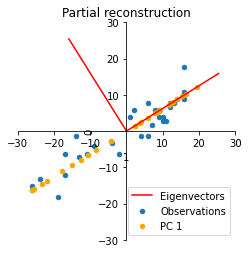

In [245]:
fig, ax = plt.subplots()

df.plot.scatter(*var_a, ax = ax)

ax.plot((0, v[0, 0] * 30), (0, v[1, 0] * 30),
    color = "r")
ax.plot((0, v[0, 1] * 30), (0, v[1, 1] * 30),
    color = "r")

rec.plot.scatter(1, 0, ax = ax, color = "orange")

ax.set_title("Partial reconstruction")
ax.legend(["_", "Eigenvectors", "Observations", "PC 1"])
#ax.set_xlabel(var_a[0])
#ax.set_ylabel(var_a[1])

# Centra los ejes.
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_xticks( list(ax.get_xticks())[0:3]
    + list(ax.get_xticks())[-3:] )
ax.set_xticks( [-30, -20, -10, 10, 20, 30] )
ax.set_yticks( list(ax.get_xticks())[0:3]
    + list(ax.get_xticks())[-3:] )
ax.set_yticks( [-30, -20, -10, 10, 20, 30] )
ax.set_aspect("equal")
ax.set_aspect("equal")

(0.0, 30.0)

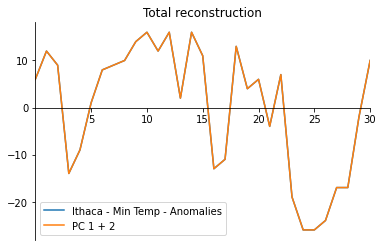

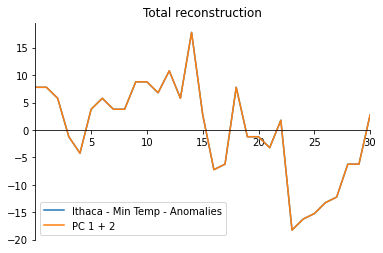

In [230]:
# Reconstrucción total

rec = PC @ v.T

fig, ax = plt.subplots()

df[var_a[0]].plot(ax = ax)
rec.iloc[:, 0:1].plot(ax = ax)

ax.set_title("Total reconstruction")
#ax.set_xlabel("Day")
#ax.set_ylabel(var_a[0])
ax.legend([var_a[0], "PC 1 + 2"])

# Centra los ejes.
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xticks(ax.get_xticks()[1:])
ax.set_xticks(np.arange(5, 35, 5))
ax.set_xlim(0, 30)


fig, ax = plt.subplots()

df[var_a[1]].plot(ax = ax)
rec.iloc[:, 1:2].plot(ax = ax)

ax.set_title("Total reconstruction")
#ax.set_xlabel("Day")
#ax.set_ylabel(var_a[0])
ax.legend([var_a[0], "PC 1 + 2"])

# Centra los ejes.
ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xticks(ax.get_xticks()[1:])
ax.set_xticks(np.arange(5, 35, 5))
ax.set_xlim(0, 30)